<a href="https://colab.research.google.com/github/iam-fern/Generate_homo_random/blob/main/data_var_random.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.stats import norm
from numpy.random import normal
import statistics
import statistics as stats
import scipy.stats as ss
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
%matplotlib inline
from google.colab import files

In [9]:
sp.random.seed(123345)
data = pd.DataFrame({"X1" : sp.random.uniform(20, 100, 500000),
                     "X2" : sp.random.uniform(20, 100, 500000),
                     "X3" : sp.random.uniform(20, 100, 500000)})
data

,X1,X2,X3
0,43.698982,32.198967,97.829085
1,35.822274,45.366109,70.423067
2,21.161244,59.928898,59.027706
3,80.732617,57.607154,22.420098
4,79.853972,21.033509,87.971231
...,...,...,...
499995,88.450434,31.265796,37.523156
499996,47.568769,40.669961,60.165898
499997,55.072528,79.460519,49.766298
499998,20.209161,73.734954,29.063672


In [27]:
X1 = data["X1"]
X2 = data["X2"]
X3 = data["X3"]

new_data = pd.DataFrame({"X1" : data["X1"],
                         "X2" : data["X2"],
                         "X3" : data["X3"],
                         "e"  : np.random.normal(0, 1*((X2)**0), 500000)})

In [28]:
new_data.to_csv('data_var2_random.csv')
files.download('data_var2_random.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [35]:
n=60
rep=0
table_data_all=pd.DataFrame({"rep":[]})
data_copy=new_data.copy()
while not data_copy.empty:
    #=========================
    if data_copy.shape[0]>n:
        index=data_copy.sample(n).index
        data_new=data_copy.loc[index,:].reset_index(drop=True)
        data_copy=data_copy.drop(index)
    else:
        data_new=data_copy.copy().reset_index(drop=True)
        data_copy=pd.DataFrame({"":[]})
    #=========================

    table_data = pd.DataFrame({"x1" : data_new["X1"],
                               "x2" : data_new["X2"],
                               "x3" : data_new["X3"],
                               "e"  : data_new["e"]})
  

    table_data["Y"] = 10 + table_data["x1"] + table_data["x2"] + table_data["x3"] + table_data["e"]
    
    table_data=table_data.reset_index(drop=True).reset_index()
    table_data["rep"]=rep
    table_data_all=pd.concat([table_data_all,table_data],axis=0,ignore_index=True,sort=False)
    rep+=1
    if rep==1000:
      break
table_data_all=table_data_all.set_index(["rep", "index"])
table_data_all

x1         x2         x3         e           Y
rep   index                                                       
0.0   0.0    26.331948  87.573306  80.340732 -0.920617  203.325370
      1.0    45.629743  41.260260  94.998028 -0.476816  191.411214
      2.0    37.682178  43.163568  69.928386 -0.478203  160.295929
      3.0    35.749754  73.079022  93.767070  0.753779  213.349624
      4.0    73.939699  78.708769  77.064964  1.603432  241.316865
...                ...        ...        ...       ...         ...
999.0 55.0   79.155946  40.654620  97.473918  0.102783  227.387267
      56.0   63.500982  20.587943  84.995835  2.571224  181.655984
      57.0   66.761133  88.975155  99.703503  0.722214  266.162005
      58.0   88.694400  62.535093  64.102160  1.198863  226.530516
      59.0   42.678128  40.337225  91.487663  0.335814  184.838830

[60000 rows x 5 columns]

In [36]:
x = table_data_all[["x1", "x2", "x3",]]
y = table_data_all["Y"]
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
y_pred = model.predict(x)

df = pd.DataFrame({"Actual": y, "Predicted": y_pred})

table_data_new = pd.DataFrame({"x1"   : table_data_all["x1"],
                               "x2"   : table_data_all["x2"],
                               "x3"   : table_data_all["x3"],
                               "e"     : table_data_all["e"],
                               "Y"     : df["Actual"],
                               "y_hat" : df["Predicted"]})
table_data_new["e_hat"] = table_data_new["Y"] - table_data_new["y_hat"]
table_data_new

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    26.331948  87.573306  80.340732  ...  203.325370  204.252904 -0.927534
      1.0    45.629743  41.260260  94.998028  ...  191.411214  191.902182 -0.490968
      2.0    37.682178  43.163568  69.928386  ...  160.295929  160.785465 -0.489537
      3.0    35.749754  73.079022  93.767070  ...  213.349624  212.605742  0.743882
      4.0    73.939699  78.708769  77.064964  ...  241.316865  239.709863  1.607002
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   79.155946  40.654620  97.473918  ...  227.387267  227.290941  0.096326
      56.0   63.500982  20.587943  84.995835  ...  181.655984  179.096967  2.559017
      57.0   66.761133  88.975155  99.703503  ...  266.162005  265.439861  0.722143
      58.0   88.694400  62.535093  64.102160  ...  226.530516  225.325473  1.205043
      59.0   42.678128  40.337225  91.487663  ...  184.838830  184.517467  0.321363

[60000 rows x 7 columns]

In [37]:
table_data_new.to_csv("data_var2_random_n60_(X2)__0.csv")
files.download("data_var2_random_n60_(X2)__0.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

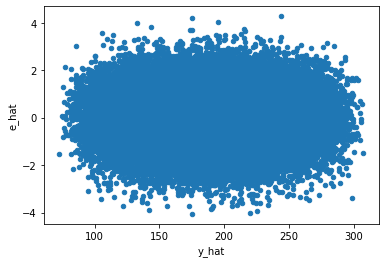

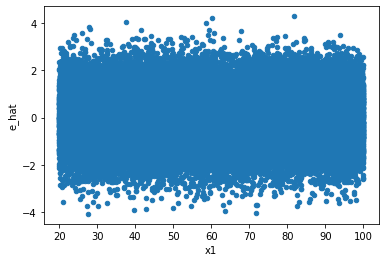

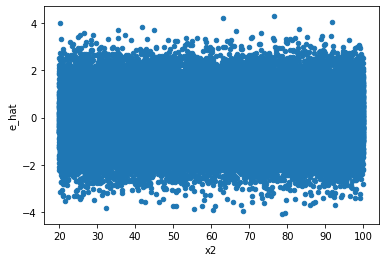

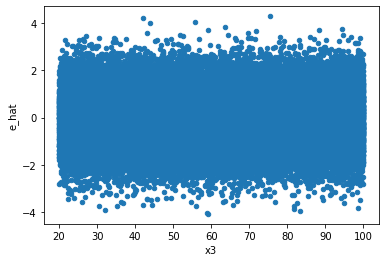

In [38]:
table_data_new.plot(x ='y_hat', y='e_hat', kind = 'scatter')
table_data_new.plot(x ='x1', y='e_hat', kind = 'scatter')
table_data_new.plot(x ='x2', y='e_hat', kind = 'scatter')
table_data_new.plot(x ='x3', y='e_hat', kind = 'scatter')